In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
filtrado = dados[['Sem Epi Evolucao','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado = filtrado.groupby('Sem Epi Evolucao').count()
filtrado = filtrado.reset_index()
filtrado

,Sem Epi Evolucao,Classificacao final,Evolucao
0,2020_13,3,3
1,2020_14,4,4
2,2020_15,10,10
3,2020_16,8,8
4,2020_17,12,12
...,...,...,...
134,2022_42,10,10
135,2022_43,9,9
136,2022_44,10,10
137,2022_45,4,4


In [6]:
semana = filtrado.set_index('Sem Epi Evolucao')
semana = semana.reset_index()
semana = semana['Sem Epi Evolucao']
semana

0      2020_13
1      2020_14
2      2020_15
3      2020_16
4      2020_17
        ...   
134    2022_42
135    2022_43
136    2022_44
137    2022_45
138    2022_46
Name: Sem Epi Evolucao, Length: 139, dtype: object

In [7]:
obito = filtrado.set_index('Sem Epi Evolucao')
obito = obito['Evolucao']
obito

Sem Epi Evolucao
2020_13     3
2020_14     4
2020_15    10
2020_16     8
2020_17    12
           ..
2022_42    10
2022_43     9
2022_44    10
2022_45     4
2022_46     8
Name: Evolucao, Length: 139, dtype: int64

In [8]:
legenda = pd.DataFrame(columns={'Óbitos confirmados para COVID-19'})

In [9]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

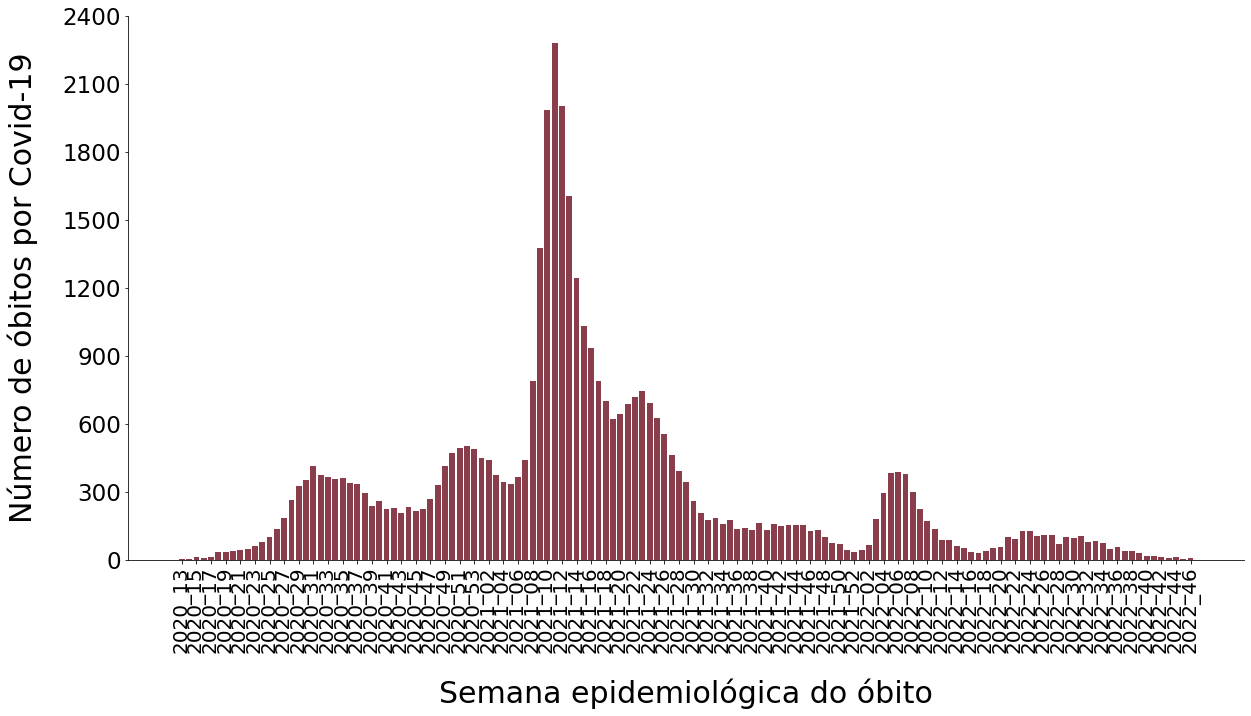

In [10]:
plt.figure(figsize=(20,10))
plt.bar(semana,obito,color='#8a3e4b')
sns.despine()
plt.xticks(np.arange(0,np.size(semana),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,2700,300),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Covid-19',labelpad=25,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitos_Covid.png',dpi=300,bbox_inches='tight')

In [11]:
zoomObito = filtrado
zoomObito = zoomObito.set_index('Sem Epi Evolucao')
zoomObito = zoomObito['2022_01':]
zoomObito

,Classificacao final,Evolucao
Sem Epi Evolucao,,
2022_01,42,42
2022_02,64,64
2022_03,179,179
2022_04,295,295
2022_05,383,383
2022_06,386,386
2022_07,380,380
2022_08,299,299
2022_09,225,225


In [12]:
zoomSemana = zoomObito
zoomSemana = zoomSemana.reset_index()
zoomSemana = zoomSemana['Sem Epi Evolucao']
zoomSemana

0     2022_01
1     2022_02
2     2022_03
3     2022_04
4     2022_05
5     2022_06
6     2022_07
7     2022_08
8     2022_09
9     2022_10
10    2022_11
11    2022_12
12    2022_13
13    2022_14
14    2022_15
15    2022_16
16    2022_17
17    2022_18
18    2022_19
19    2022_20
20    2022_21
21    2022_22
22    2022_23
23    2022_24
24    2022_25
25    2022_26
26    2022_27
27    2022_28
28    2022_29
29    2022_30
30    2022_31
31    2022_32
32    2022_33
33    2022_34
34    2022_35
35    2022_36
36    2022_37
37    2022_38
38    2022_39
39    2022_40
40    2022_41
41    2022_42
42    2022_43
43    2022_44
44    2022_45
45    2022_46
Name: Sem Epi Evolucao, dtype: object

In [13]:
zoomObito = zoomObito['Evolucao']
zoomObito

Sem Epi Evolucao
2022_01     42
2022_02     64
2022_03    179
2022_04    295
2022_05    383
2022_06    386
2022_07    380
2022_08    299
2022_09    225
2022_10    170
2022_11    134
2022_12     85
2022_13     87
2022_14     59
2022_15     53
2022_16     35
2022_17     28
2022_18     40
2022_19     51
2022_20     58
2022_21    102
2022_22     93
2022_23    125
2022_24    125
2022_25    104
2022_26    111
2022_27    110
2022_28     71
2022_29     98
2022_30     95
2022_31    105
2022_32     76
2022_33     83
2022_34     72
2022_35     48
2022_36     55
2022_37     40
2022_38     39
2022_39     29
2022_40     17
2022_41     16
2022_42     10
2022_43      9
2022_44     10
2022_45      4
2022_46      8
Name: Evolucao, dtype: int64

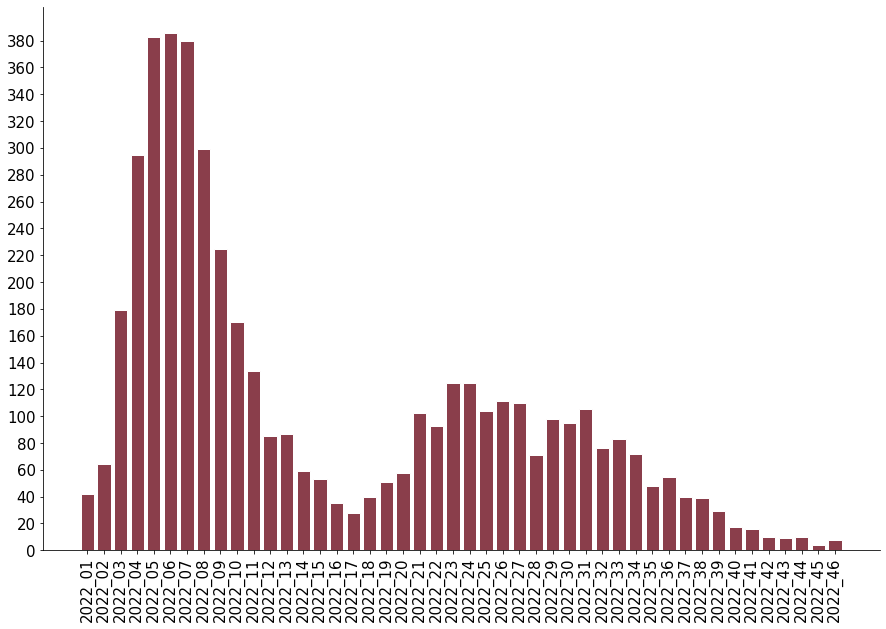

In [15]:
plt.figure(figsize=(15,10))
width=0.8
plt.bar(zoomSemana,zoomObito,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,400,20),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitosZoom_Covid.png',dpi=300,bbox_inches='tight')